# Global Power Plant Database

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("global-power-plant-database.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

dataset has 907 columns and 27 rows.

We need to predict 2 labels :  1.primary_fuel 2.capacity_mw. 

primary fuel is having catagorical data so we can say this is our classificatin model and  capacity_mw is having continous data we will make Regression model .

In [30]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [31]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [32]:
df.shape          

(907, 27)

AS other_fuel3 ,wepp_id ,generation_gwh_2013 ,generation_gwh_2019 ,estimated_generation_gwh  has all null values and other_fuel2 has only one value we can remove all these columns. And as owners also dont have any contibution in our data set we can drop it.  

In [33]:
df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','other_fuel2','owner', 'gppd_idnr', 'year_of_capacity_data','generation_data_source'],axis=1,inplace=True)


In [34]:
df.shape   

(907, 17)

#### Filling the null values

In [35]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [36]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [38]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [39]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

In [40]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [42]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [43]:
df.isnull().sum()

country                0
country_long           0
name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

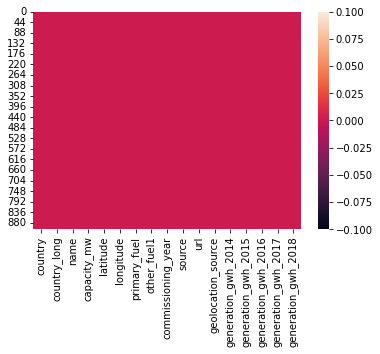

In [45]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Now we have removed all null values from our dataset

#### Feature Selection

In [46]:
collist = df.columns.values
for i in collist:
    print(f"unique value of {i} is  {df[i].unique()}\n")

unique value of country is  ['IND']

unique value of country_long is  ['India']

unique value of name is  ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP

As country and country_long has only one value we can drop it.

we can drop name column 'name' and 'url' column as it does not contributes to our model prediction.

In [47]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [48]:
df.drop(['name','url'],axis=1,inplace=True)

In [49]:
cols = df.columns
num_cols = df._get_numeric_data().columns

categorical_data = list(set(cols)-set(num_cols))
categorical_data

['source', 'geolocation_source', 'primary_fuel', 'other_fuel1']

In [50]:
df['source'] = df['source'].astype(str)
df['other_fuel1'] = df['other_fuel1'].astype(str)
df['geolocation_source']=df['geolocation_source'].astype(str)
df['primary_fuel'] = df['primary_fuel'].astype(str)


In [51]:
from sklearn.preprocessing import LabelEncoder
cat_col = ['geolocation_source','primary_fuel','source','other_fuel1']
le= LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [52]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.000000,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,1997.091082,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,22,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,1997.091082,77,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2,1997.091082,59,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [53]:
df.shape

(907, 13)

In [54]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

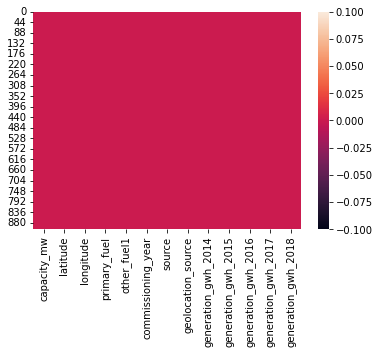

In [55]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [57]:
#Checking the skewness of the dataset
df.skew().sort_values()

other_fuel1           -20.453120
geolocation_source     -2.159841
commissioning_year     -1.399359
latitude               -0.149698
primary_fuel            0.472251
longitude               1.141881
source                  1.827373
capacity_mw             3.123576
generation_gwh_2018     4.937907
generation_gwh_2014     5.035446
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2015     5.364134
dtype: float64

In [58]:
# Checking the count of other_fuel1
df["other_fuel1"].value_counts()

2    904
1      2
0      1
Name: other_fuel1, dtype: int64

In [59]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,43.847850,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,44.642818,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,22.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,29.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Key Observations:

There is large difference between 75% and max value in most of columns which means outliers are present. And we can see that skewness also present in many columns.

In [60]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.003105,0.274292,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.036695,0.102069,5.592656e-02,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,0.030311,0.092331,-2.393334e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.126650,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
other_fuel1,0.003105,0.036695,0.030311,0.004912,1.000000,0.036904,2.658990e-02,-2.140831e-02,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02
commissioning_year,0.274292,0.102069,0.092331,-0.126650,0.036904,1.000000,2.152776e-02,-7.843657e-03,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01
source,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.021528,1.000000e+00,-5.057202e-01,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.007844,-5.057202e-01,1.000000e+00,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,0.024505,0.133051,1.917854e-18,-2.966463e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.026790,0.147338,-2.160931e-17,-6.339264e-18,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01


<AxesSubplot:>

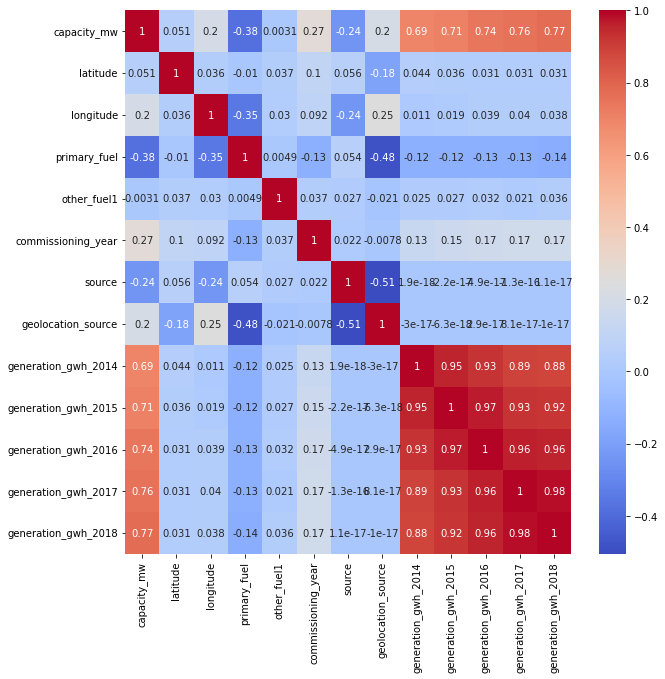

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Keeping 'capacity_mw' as target variable

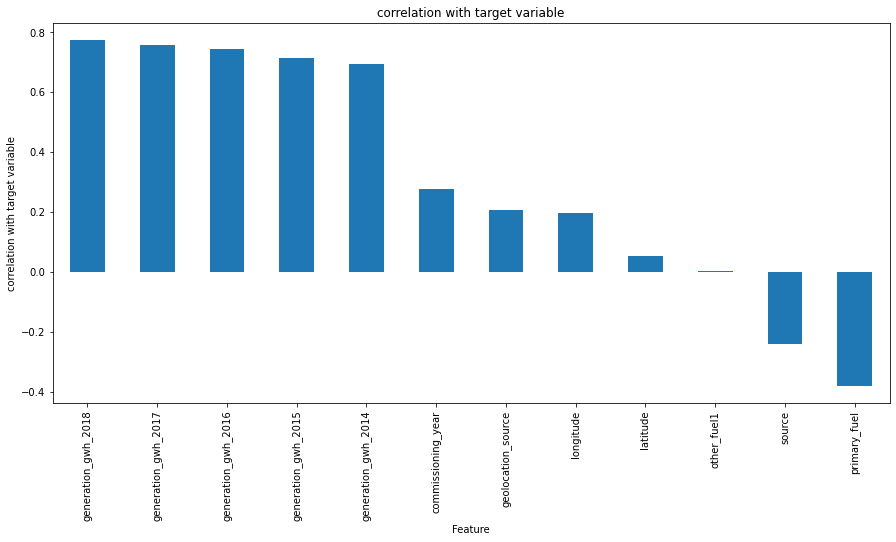

In [65]:
plt.figure(figsize=(15,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot.bar()
plt.xlabel("Feature")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")
plt.show()

1. 'generation_gwh_2018','generation_gwh_2017','generation_gwh_2016' has postive correlation with target variable.
2. 'primary_fuel' has negative correlation with target variable

In [66]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.000000,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,1997.091082,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [67]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [68]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

# Data Visualizations:

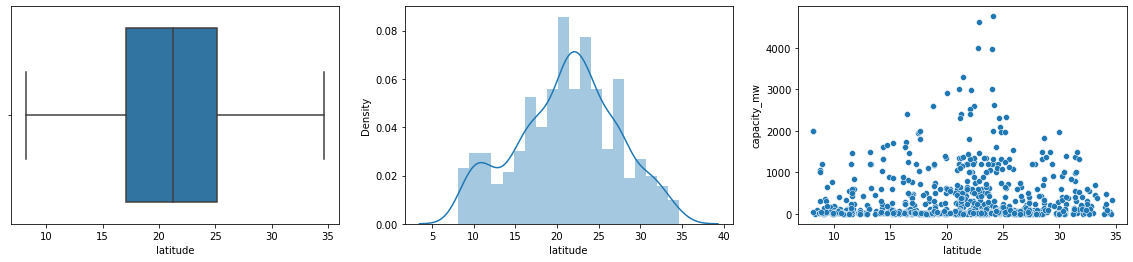

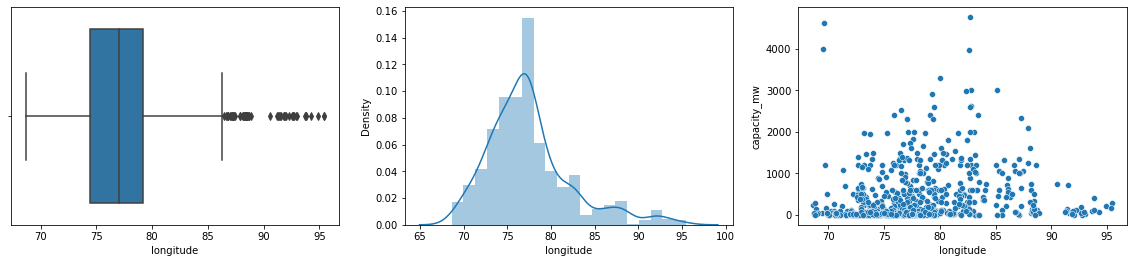

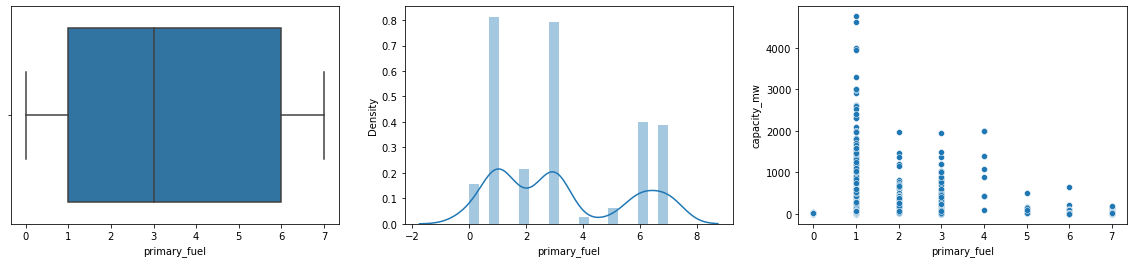

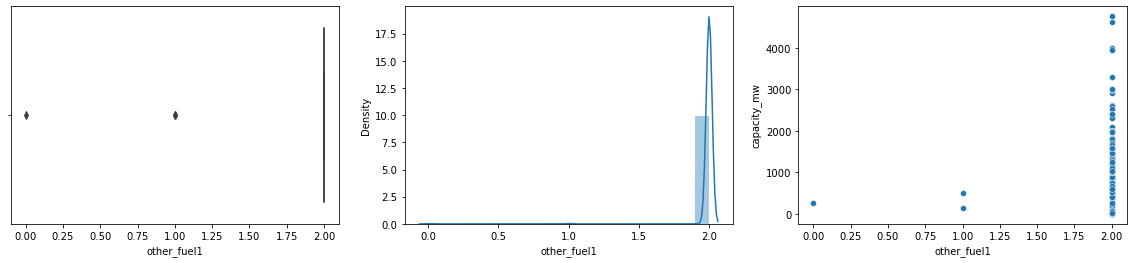

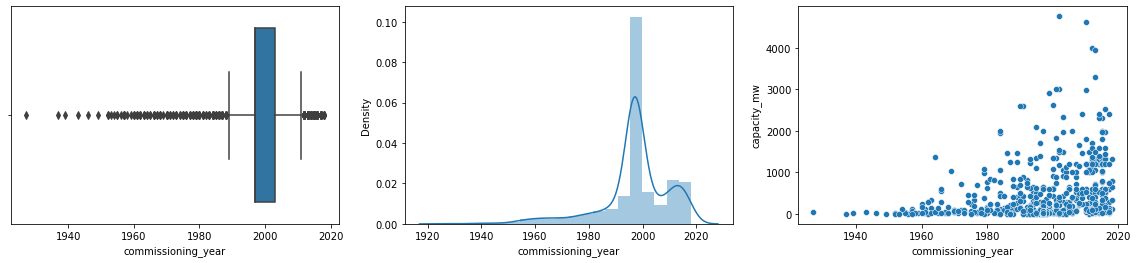

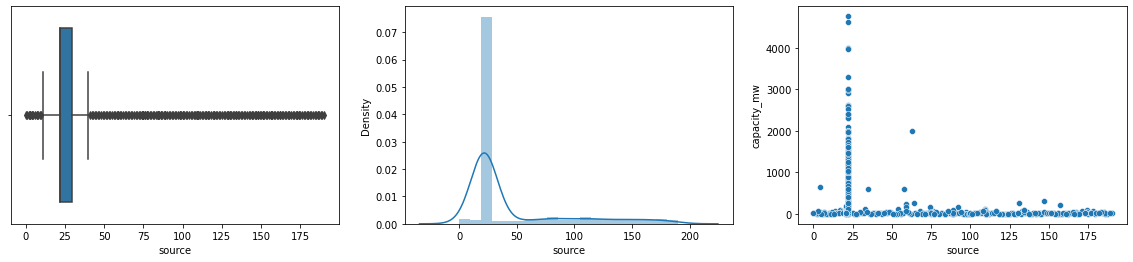

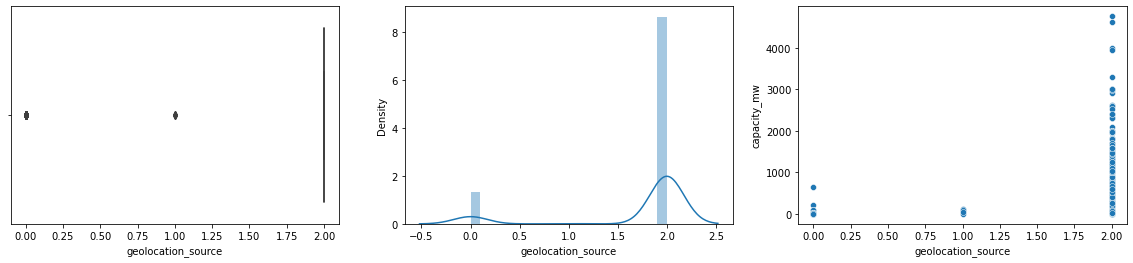

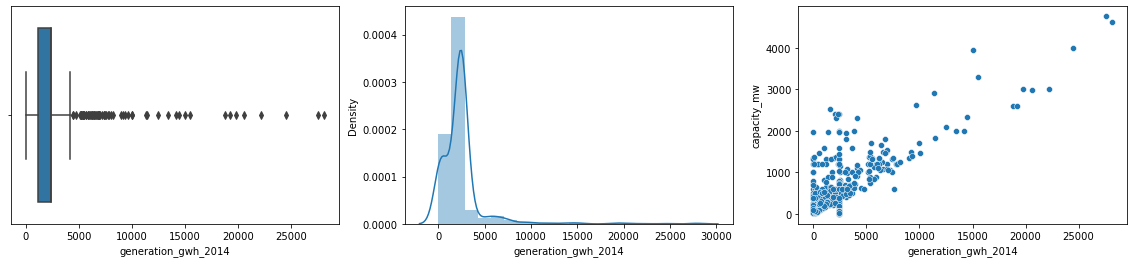

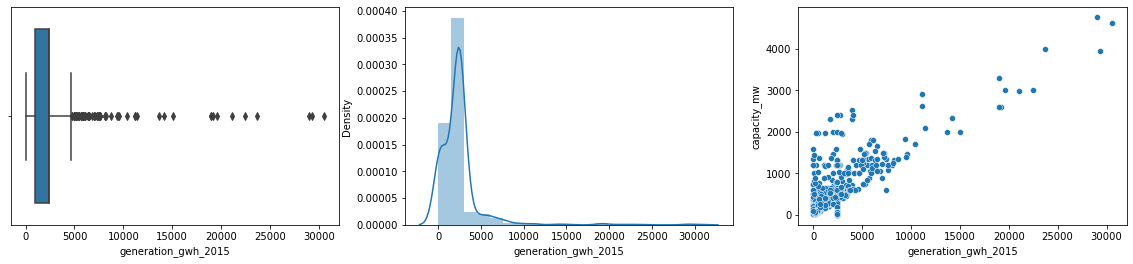

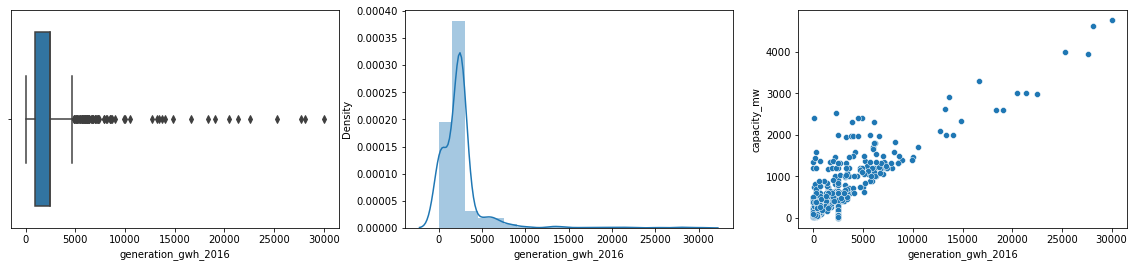

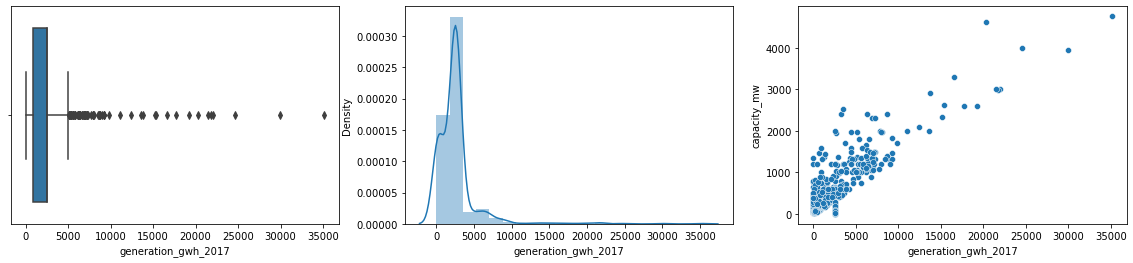

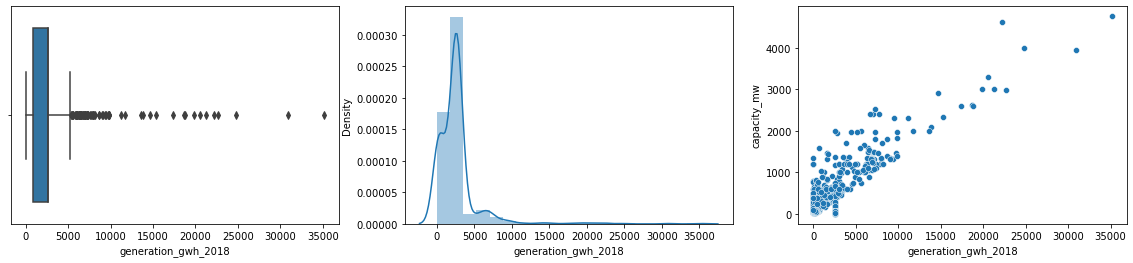

In [71]:
target_variable = 'capacity_mw'
feature_variable = ['latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],bins=20,kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable,ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)

The above analysis shows the relationship between target and feature variable in different views

# skewness:

In [72]:
df.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

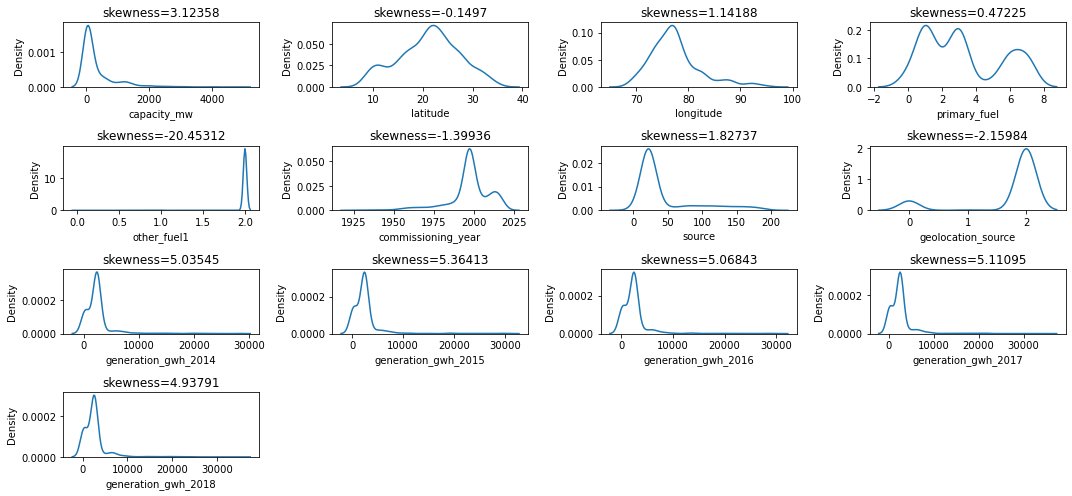

In [74]:
collist = df.columns.values
plt.figure(figsize=(15,7))

for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness={round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

keeping +/-0.5 as skew value more columns are with skew. Lets remove skew using power transform method.

Removing skewness:

In [75]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [76]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

7      0.123226
8      0.074582
9      0.041821
10     0.018337
1      0.002926
11     0.000783
2     -0.047067
0     -0.074269
4     -0.080999
5     -0.214066
6     -2.132728
3    -17.330022
dtype: float64

In [77]:
x = pd.DataFrame((x_new),columns=x.columns)

In [78]:
x.skew()

latitude               -0.074269
longitude               0.002926
primary_fuel           -0.047067
other_fuel1           -17.330022
commissioning_year     -0.080999
source                 -0.214066
geolocation_source     -2.132728
generation_gwh_2014     0.123226
generation_gwh_2015     0.074582
generation_gwh_2016     0.041821
generation_gwh_2017     0.018337
generation_gwh_2018     0.000783
dtype: float64

# Detecting Outliers:

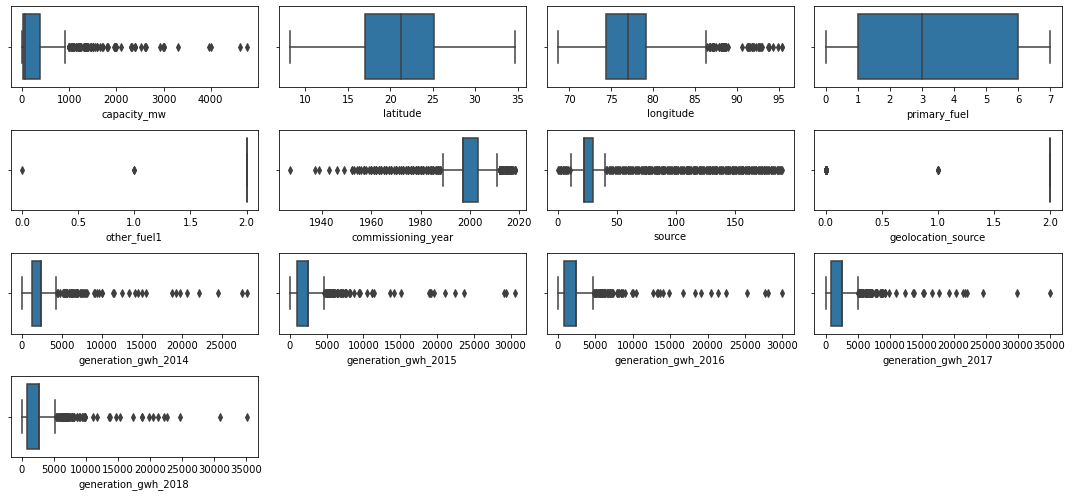

In [79]:
plt.figure(figsize=(15,7))
collist = df.columns.values
for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    ax = sns.boxplot(df[collist[i]])
    plt.tight_layout()

Except 'gppd_idnr', 'latitude', 'primary_fuel' all other columns have outliers present

Removing Outliers:

In [80]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
X_new = x[(z>3).all(axis=1)]

In [81]:
print("Old DataFrame", x.shape)
print("New DataFrame", X_new.shape)
print("Rows Lost",x.shape[0]-X_new.shape[0])

Old DataFrame (907, 12)
New DataFrame (0, 12)
Rows Lost 907


Here all rows are lost so we need to perform further analysis without removing outliers

# Scaling Data

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Multicolinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns
vif

,vif,feature
0,1.059790,latitude
1,1.238705,longitude
2,1.600893,primary_fuel
3,1.044905,other_fuel1
4,1.103392,commissioning_year
5,1.342731,source
6,1.757014,geolocation_source
7,4.951800,generation_gwh_2014
8,8.967154,generation_gwh_2015
9,13.121880,generation_gwh_2016


All columns have less values so we no need to remove any columns

# Training model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict

In [86]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=.22,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = r2_score(y_test,y_pred)
    if temp>acc:
        acc=temp
        best_rstate = i
 
print("Accuracy : ",acc*100,"RandomState : ",best_rstate)

Accuracy :  50.566757053554426 RandomState :  900


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.22,random_state=996)

In [88]:
x_train.shape

(707, 12)

In [89]:
x_test.shape

(200, 12)

In [90]:
y_train.shape

(707,)

In [91]:
y_test.shape

(200,)

In [92]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [93]:
li = LinearRegression()
la = Lasso()
ri = Ridge()
en = ElasticNet()
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()

model = [li,la,ri,en,kn,dtr,rfr,ada]

In [94]:
score = []
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    print("Accuracy Score of ",m," is : ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm = m.predict(x_test)
    
    print("Mean Squared Error is : ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error is : ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is : ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("\n")

Accuracy Score of  LinearRegression()  is :  0.4966734773294881
Mean Squared Error is :  147566.7779401603
Mean Absolute Error is :  291.60402434781827
R2 Score is :  0.5086645354441632


Accuracy Score of  Lasso()  is :  0.4965569858181572
Mean Squared Error is :  147386.73356502975
Mean Absolute Error is :  291.2798357800225
R2 Score is :  0.5092640076826321


Accuracy Score of  Ridge()  is :  0.496671913460202
Mean Squared Error is :  147544.36940484
Mean Absolute Error is :  291.5999007187513
R2 Score is :  0.5087391464661379


Accuracy Score of  ElasticNet()  is :  0.47104102022517924
Mean Squared Error is :  152059.34137096966
Mean Absolute Error is :  290.88648221179557
R2 Score is :  0.49370618390233856


Accuracy Score of  KNeighborsRegressor()  is :  0.8689107314909268
Mean Squared Error is :  51697.40392756879
Mean Absolute Error is :  114.418566
R2 Score is :  0.8278693325852584


Accuracy Score of  DecisionTreeRegressor()  is :  0.9999768773706031
Mean Squared Error is :  

Here we have DecisionTreeRegressor with 100% accuracy followed by RandomForestRegressor with 97% accuracy. But we need to cross validate to conform this accuracy.

# Cross Validate

In [95]:
mean_score = []
std = []

for m in model:
    CV= cross_val_score(m,x,y,cv=5)
    print("Score of ",m," is ",CV)
    print("Mean Score is ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  LinearRegression()  is  [0.32375013 0.34031232 0.45047488 0.53421255 0.5405847 ]
Mean Score is  0.43786691436140474
Standard Deviation is  0.0922300649345705


Score of  Lasso()  is  [0.32829339 0.34330839 0.44997588 0.5361549  0.53943381]
Mean Score is  0.4394332726192115
Standard Deviation is  0.0906183116469842


Score of  Ridge()  is  [0.32452194 0.3406623  0.45051051 0.53499756 0.54034812]
Mean Score is  0.43820808611075873
Standard Deviation is  0.09207807404807401


Score of  ElasticNet()  is  [0.39546477 0.35961676 0.42844463 0.52251683 0.48929835]
Mean Score is  0.4390682681093231
Standard Deviation is  0.05968817502655917


Score of  KNeighborsRegressor()  is  [0.78091824 0.74815467 0.78593008 0.82936149 0.81249982]
Mean Score is  0.7913728588449986
Standard Deviation is  0.027914939412672313


Score of  DecisionTreeRegressor()  is  [0.80413942 0.58012575 0.79365905 0.7254779  0.83418586]
Mean Score is  0.7475175952321346
Standard Deviation is  0.09094199353659109



Here We Have RandomForestRegressor with 85% accuracy we can further hypertune to improvr accuracy.

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf,x_train,y_train,cv=5,n_jobs=-1).mean()

327.91532928835153

In [97]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [98]:
para_grid = [{"criterion":['mse','mae'],
             "n_estimators":[10,20,30,50,100],
             "max_features":["auto","sqrt","log2"],
             "min_samples_split":[2,4,8]}]

rf = RandomForestRegressor(random_state=42)

In [99]:
reg_grid = GridSearchCV(rf,para_grid,n_jobs=-1,cv=5)

In [100]:
reg_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [102]:
reg_grid.best_score_

0.8452431871698011

In [103]:
reg_grid.best_estimator_

RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=42)

In [105]:
reg_final_model = reg_grid.best_estimator_
pred = cross_val_predict(reg_final_model,x_train,y_train,cv=5,n_jobs=-1)
pred.mean()

324.04812301409777

In [106]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=42)

In [107]:
reg_final_model.score(x_train,y_train)

0.9797838934762996

After hypertuning we get 97.9% accuracy

# Saving the best model:

In [108]:
import joblib
joblib.dump(reg_final_model,"Global_Power_plant_Capacity_cw_prediction.obj")

['Global_Power_plant_Capacity_cw_prediction.obj']

# Keeping Primary fuel as target variable:

<AxesSubplot:>

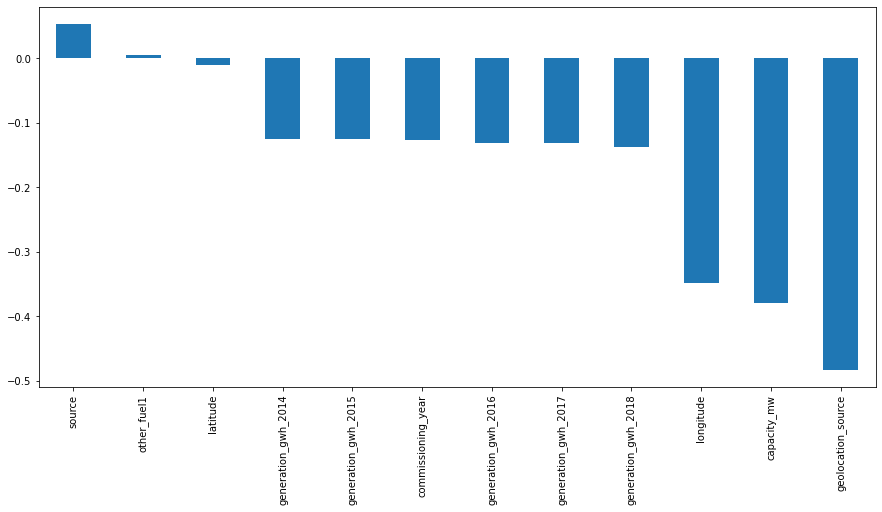

In [109]:
plt.figure(figsize=(15,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot.bar()

# key observations:

'geolocation_source' is negatively correlated with the target variable

In [110]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [112]:
x1 = df.drop(['primary_fuel'],axis=1)
y1 = df['primary_fuel']

# Data Visulaization:

In [114]:
target_variable1 = 'primary_fuel'
feature_variable = ['capacity_mw', 'latitude', 'longitude',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

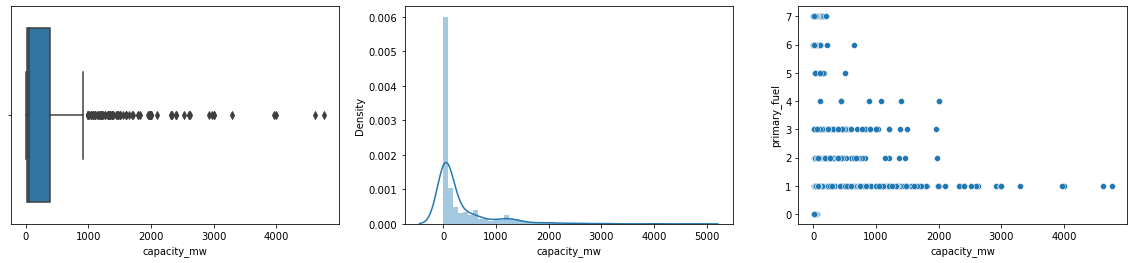

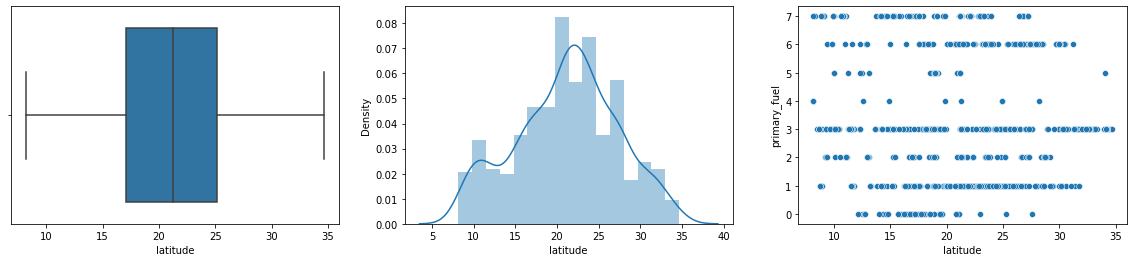

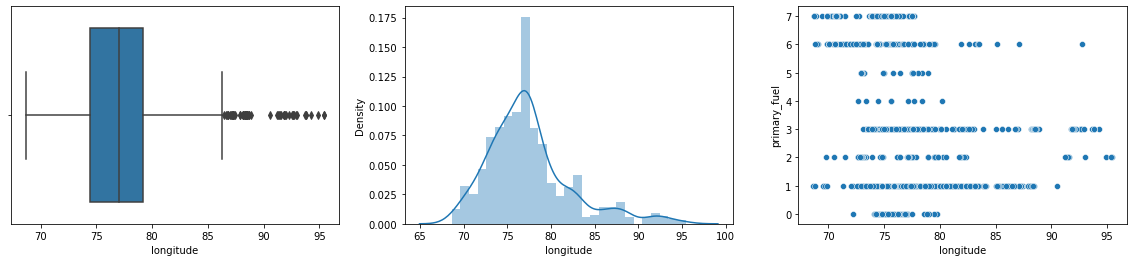

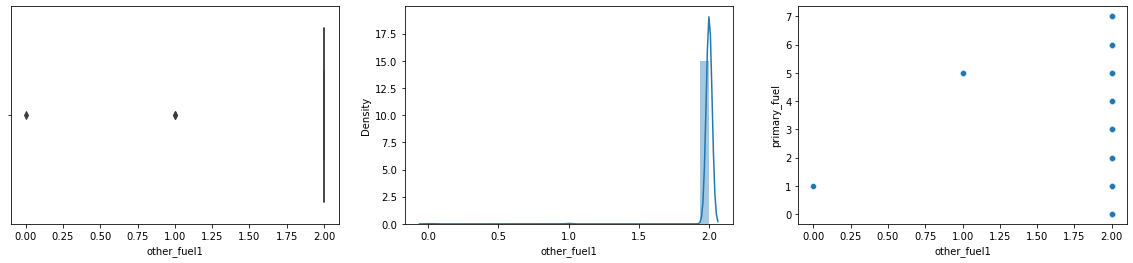

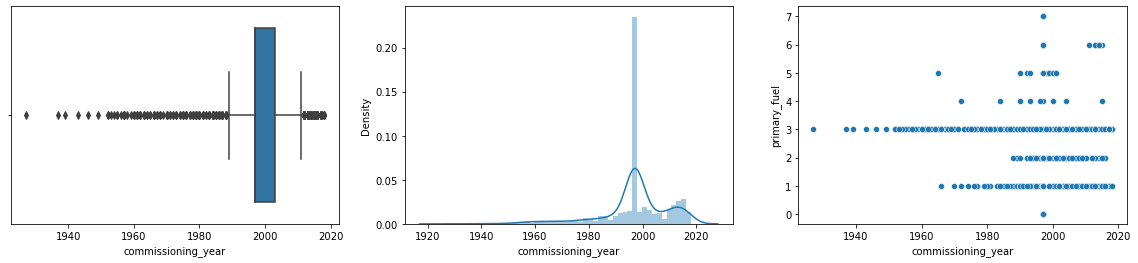

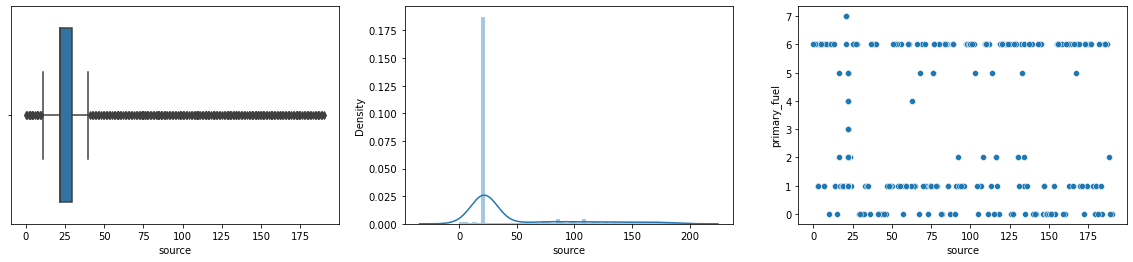

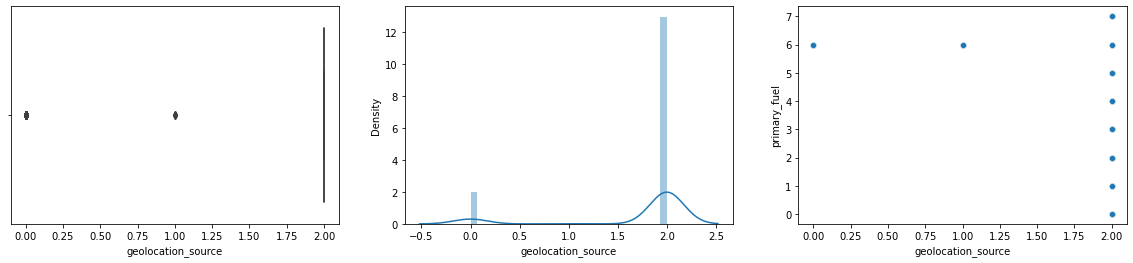

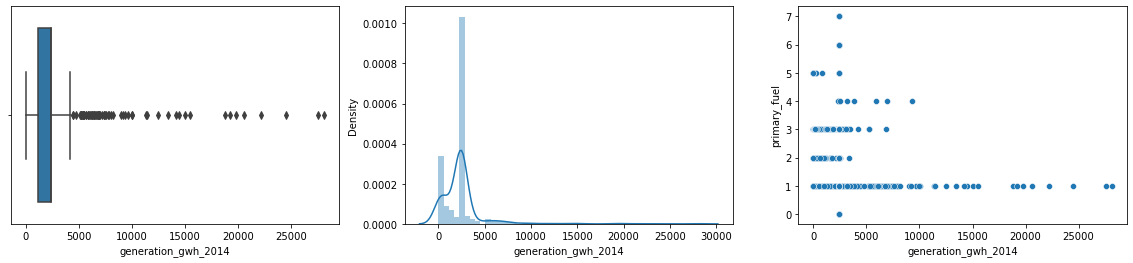

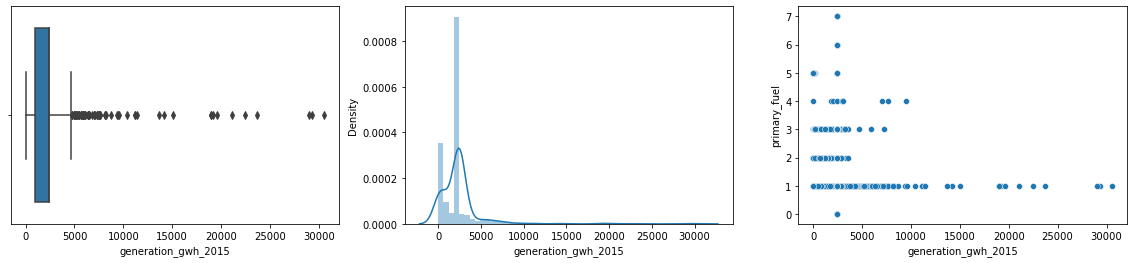

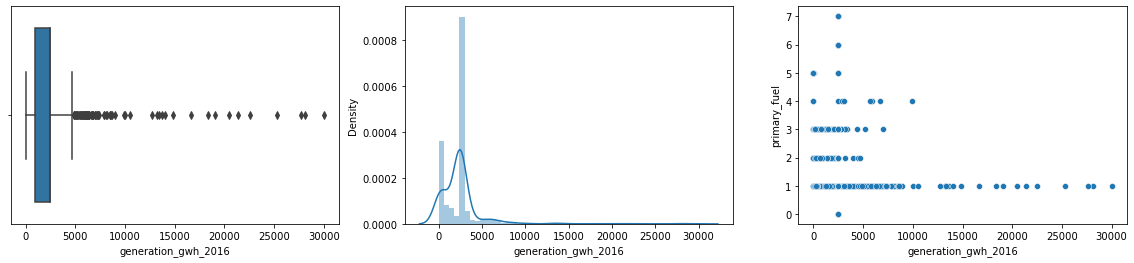

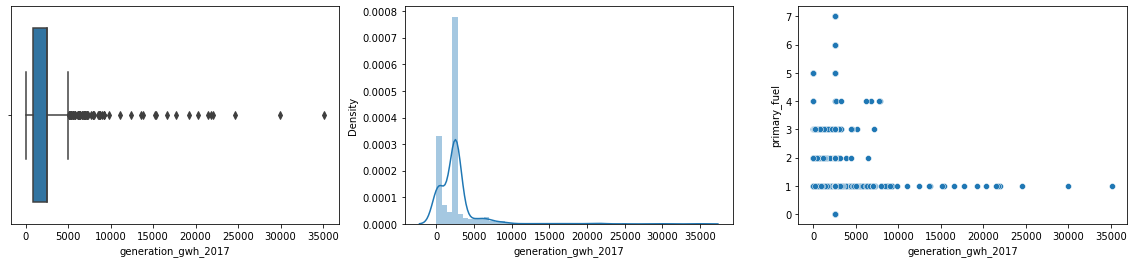

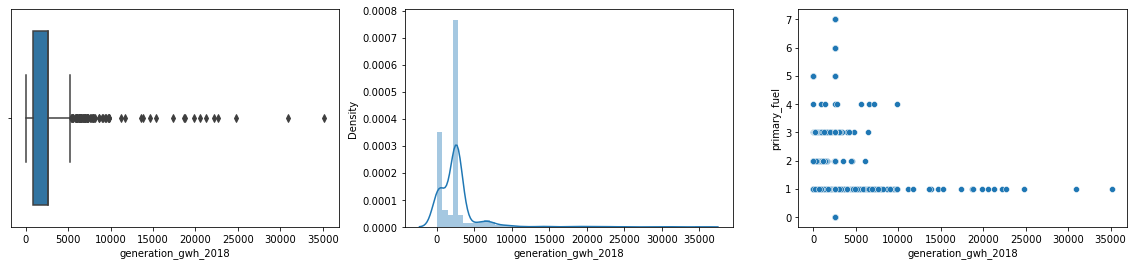

In [116]:
def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable1)
    plt.show()
for i in feature_variable:
    num_plots(i)

we can visualize the relationship between target and the feature variable from above analysis.

# Skewness:

In [117]:
df.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

Removing skewness:

In [118]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x1,method='yeo-johnson')

In [119]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

7      0.123226
8      0.074582
9      0.041821
0      0.022164
10     0.018337
2      0.002926
11     0.000783
1     -0.074269
4     -0.080999
5     -0.214066
6     -2.132728
3    -17.330022
dtype: float64

In [120]:
x1 = pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers:

latitude                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
longitude               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
primary_fuel            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
other_fuel1             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
commissioning_year        AxesSubplot(0.125,0.518913;0.168478x0.16413)
source                 AxesSubplot(0.327174,0.518913;0.168478x0.16413)
geolocation_source     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
generation_gwh_2014    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
generation_gwh_2015       AxesSubplot(0.125,0.321957;0.168478x0.16413)
generation_gwh_2016    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
generation_gwh_2017    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
generation_gwh_2018    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

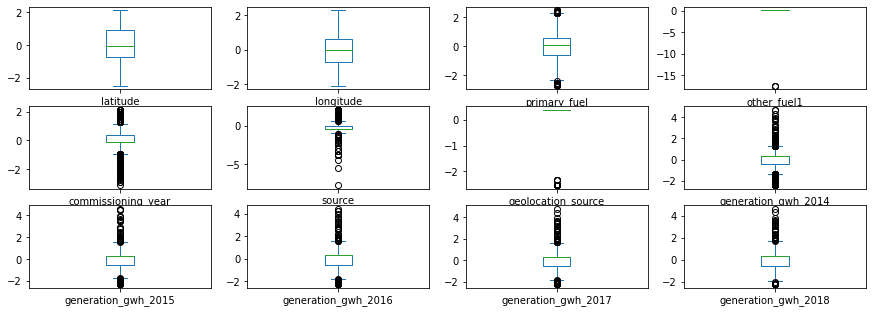

In [121]:
x1.plot(kind='box',subplots='True',layout=(4,4),figsize=(15,7))

Outliers are present in 'commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018'

Removing outliers:

In [122]:
from scipy.stats import zscore
z = np.abs(zscore(x1))
threshold = 3
x1_new = x1[(z<3).all(axis=1)]

In [123]:
print("Old DataFrame : ",x1.shape)
print("New DataFrame : ", x1_new.shape)
print("Rows Dropped : ",x1.shape[0] - x1_new.shape[0])

Old DataFrame :  (907, 12)
New DataFrame :  (881, 12)
Rows Dropped :  26


In [124]:
percentage_loss = (907-887)/907*100
percentage_loss

2.2050716648291067

there is 2.2% data loss so we can drop the rows 

# Scaling the Data

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_scaled = sc.fit_transform(x1)

# MultiColinearity:

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x1_scaled,i) for i in range(x1_scaled.shape[1])]
vif['features'] = x1.columns
vif

,vif,features
0,1.646383,latitude
1,1.077639,longitude
2,1.187876,primary_fuel
3,1.050370,other_fuel1
4,1.186886,commissioning_year
5,1.250270,source
6,1.565414,geolocation_source
7,4.961242,generation_gwh_2014
8,8.965529,generation_gwh_2015
9,13.138493,generation_gwh_2016


as all values are low we no need to remove any rows

In [128]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

# Balancing dataset using SMOTE

In [129]:
import sklearn
sklearn.__version__

'1.1.3'

In [130]:
from imblearn.over_sampling import SMOTE

In [131]:
smt = SMOTE()
train_x,train_y = smt.fit_resample(x1,y1)

In [132]:
train_y.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Training the data

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = 0

for i in range(0,1000):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled,y1,random_state=i,test_size=.22)
    nb = GaussianNB()
    nb.fit(x1_test,y1_test)
    predy1 = nb.predict(x1_test)
    temp = accuracy_score(y1_test,predy1)
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy Score : ",acc*100,"random state : ",best_rstate)       

Accuracy Score :  77.5 random state :  425


In [134]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=359,test_size=.22)

In [135]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
gnb = GaussianNB()
svc = SVC()
kn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [gnb,svc,kn,dtc,rfc,ada]

In [137]:
for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm1 = m.predict(x1_test)
    print("Accuracy Score of ",m," is ",accuracy_score(y1_test,predm1))
    print("Mean Absolute Error is ",mean_absolute_error(y1_test,predm1))
    print("Mean Squared Error is ",mean_squared_error(y1_test,predm1))
    print("r2_score is ",r2_score(y1_test,predm1))
    
    print("Confusion Matrix : ",confusion_matrix(y1_test,predm1))
    print("Classification Report : ",classification_report(y1_test,predm1))
    print("\n\n")

Accuracy Score of  GaussianNB()  is  0.635
Mean Absolute Error is  0.79
Mean Squared Error is  1.99
r2_score is  0.6254893104486601
Confusion Matrix :  [[18  0  0  0  0  0  0  0]
 [ 7  3  0 19  5  0  0  0]
 [ 3  0  0 11  0  0  1  0]
 [ 0  0  0 47  0  0 21  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  0  0  4  0  1  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 34]]
Classification Report :                precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       1.00      0.09      0.16        34
           2       0.00      0.00      0.00        15
           3       0.57      0.69      0.63        68
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       0.52      1.00      0.69        24
           7       1.00      1.00      1.00        34

    accuracy                           0.64       200
   macro avg       0.59      0.49      0.44       200
weighted a

here we have RandomForestClassifier with 86% accuracy

# Cross Validation:

In [139]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x1,y1,cv=5)
    print("Score of ", m , " is ", CV)
    print("Mean Score is ", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  GaussianNB()  is  [0.55494505 0.54945055 0.54143646 0.54143646 0.5801105 ]
Mean Score is  0.5534758059619937
Standard Deviation is :  0.014266461841683108


Score of  SVC()  is  [0.75274725 0.7967033  0.7679558  0.77348066 0.79005525]
Mean Score is  0.7761884524315463
Standard Deviation is :  0.015733692422262427


Score of  KNeighborsClassifier()  is  [0.79120879 0.7967033  0.79005525 0.77900552 0.79558011]
Mean Score is  0.7905105943779978
Standard Deviation is :  0.006278710041381034


Score of  DecisionTreeClassifier()  is  [0.81868132 0.78021978 0.83977901 0.78453039 0.79005525]
Mean Score is  0.8026531479570155
Standard Deviation is :  0.022915623870200866


Score of  RandomForestClassifier()  is  [0.84065934 0.84615385 0.88950276 0.83425414 0.86187845]
Mean Score is  0.8544897091858419
Standard Deviation is :  0.019752221404361094


Score of  AdaBoostClassifier()  is  [0.62087912 0.47802198 0.61878453 0.45856354 0.4640884 ]
Mean Score is  0.5280675125978994
Standard De

we have RandomForestClassifier with 85% accuracy.

# Hypertuning:

In [140]:
param_grid = [{"n_estimators":[20,100,150],
              "criterion":["gini","entropy"],
              "max_features":["auto","sqrt","log2"]}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [141]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [143]:
rf_random.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 100, 150]}])

In [144]:
rf_random.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150}

In [145]:
rf_random.best_score_

0.8614424133453202

In [146]:
preds = cross_val_predict(rf_random.best_estimator_,x1_train,y1_train,cv=5,n_jobs=-1)
preds

array([3, 3, 1, 2, 1, 3, 6, 6, 7, 7, 6, 7, 1, 1, 7, 7, 1, 5, 3, 6, 7, 3,
       0, 1, 3, 2, 1, 1, 3, 1, 3, 3, 3, 6, 7, 3, 1, 6, 3, 3, 3, 1, 3, 3,
       3, 1, 5, 2, 1, 1, 1, 6, 1, 1, 1, 7, 1, 3, 5, 3, 1, 1, 3, 1, 1, 1,
       1, 3, 3, 1, 3, 6, 1, 6, 0, 0, 3, 3, 7, 3, 3, 7, 3, 0, 3, 6, 0, 3,
       7, 3, 3, 1, 7, 3, 3, 7, 1, 3, 3, 1, 6, 1, 6, 1, 6, 3, 7, 1, 3, 7,
       2, 1, 6, 7, 6, 1, 7, 0, 1, 3, 1, 0, 0, 3, 3, 0, 1, 3, 7, 7, 3, 1,
       1, 2, 6, 1, 2, 2, 1, 3, 5, 2, 1, 7, 1, 1, 3, 7, 6, 1, 3, 1, 7, 1,
       7, 3, 3, 6, 1, 1, 2, 7, 7, 3, 2, 7, 3, 3, 6, 1, 1, 3, 1, 3, 3, 3,
       1, 3, 1, 1, 3, 3, 3, 6, 6, 6, 6, 3, 1, 1, 6, 3, 6, 6, 7, 3, 3, 1,
       3, 3, 3, 1, 7, 1, 6, 6, 7, 1, 1, 1, 7, 3, 1, 3, 6, 3, 6, 6, 3, 1,
       1, 1, 3, 6, 1, 1, 5, 1, 6, 1, 1, 1, 1, 0, 6, 1, 6, 3, 6, 1, 3, 1,
       7, 3, 1, 1, 3, 7, 3, 1, 1, 3, 7, 1, 1, 1, 7, 3, 7, 1, 7, 1, 3, 3,
       3, 7, 3, 3, 0, 1, 1, 6, 1, 1, 5, 0, 7, 3, 1, 1, 1, 3, 1, 6, 2, 3,
       6, 3, 3, 1, 6, 1, 6, 6, 1, 1, 6, 7, 6, 6, 0,

In [147]:
classifier_final_model = rf_random.best_estimator_
y1_pred = classifier_final_model.predict(x1_test)

# AUC-ROC Curve

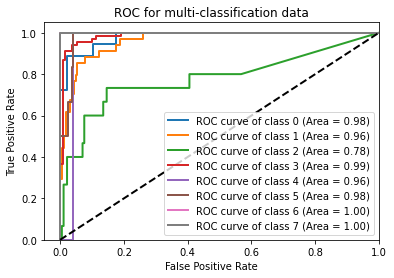

In [148]:
# Plotting ROC curve for all the models
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(classifier_final_model)
y_sco = classifier.fit(x1_train, y1_train).predict_proba(x1_test)

y_test_bin  = label_binarize(y1_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

we have RandomForestClassifier with 99% accuracy

# Saving the best model

In [149]:
import joblib
joblib.dump(classifier_final_model,"Global_Power_Plant_Primary_Fuel_Prediction.obj")

['Global_Power_Plant_Primary_Fuel_Prediction.obj']